## Project 4: Amplitude damping

In Chapter 7, we introduced the Jaynes-Cummings model. In this project, we will simulate it along with the Markovianity of the dynamics depending on the coupling strength.

You can find the circuit decomposition for the amplitude damping below.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

<ipython-input-2-b8978e8270e7>:21: DeprecationWarning: The QuantumCircuit.cu3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cu method instead, where cu3(ϴ,φ,λ) = cu(ϴ,φ,λ,0).
  ad.cu3(theta, 0.0, 0.0, q[system], q[environment])


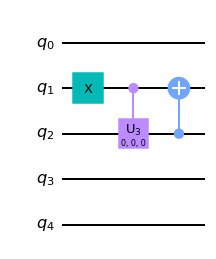

In [2]:
###########################################
#  Amplitude damping channel on IBMQ_VIGO #
###########################################

# Quantum register
q = QuantumRegister(5, name='q')

# Quantum circuit
ad = QuantumCircuit(q)

# Amplitude damping channel acting on system qubit
## Qubit identification
system = 1
environment = 2

# Define rotation angle
theta = 0.0

# Construct circuit
ad.x(q[system])
ad.cu3(theta, 0.0, 0.0, q[system], q[environment])
ad.cx(q[environment], q[system])

# Draw circuit
ad.draw(output='mpl')

Recall that, in the above circuit, $\theta = \arccos{c_1(t)}$ with
\begin{equation}
c_{1}(t)=e^{-\lambda t/2}\left[\cosh\left(\frac{\lambda t}{2}\sqrt{1-2R}\right)+\frac{1}{\sqrt{1-2R}}\sinh\left(\frac{\lambda t}{2}\sqrt{1-2R}\right)\right].
\end{equation}

### Task 1

Write a function that returns $c_1(t)$. The function should admit an extra parameter $R$ and return the correct value for $R > 1/2$ and $R < 1/2$.

Here is the suggested structure:

In [3]:
def c1(R,t):
    """Returns the coherence factor in the amplitude damping channel
    
    Args:
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A float number
    """

### Task 2

Write a function that returns the amplitude damping channel given the values of $R$ and $t$. You can choose to include the initial state of the system ($|1\rangle$) into the function or to initialize its state elsewhere later.

The suggested structure is

In [ ]:
def amplitude_damping_channel(q, c, sys, env, R, t):
    """Returns a QuantumCircuit implementing the amplitude damping channel on the system qubit
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system qubit
        sys (int): index for the system qubit
        env (int): index for the environment qubit
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A QuantumCircuit object
    """

### Task 3

Choose some (at least 2) values of $R$. There should be values above and below $1/2$. For each value, simulate the amplitude damping channel at several values of $t$ and measure the probability for the atom to be in the excited state ($|1\rangle$).

### Task 4

We now turn our atention towards the Markovianity of the dynamics. To that end, we will simulate the channel introducing the non-Markovianity witness (you can find the circuit below). 

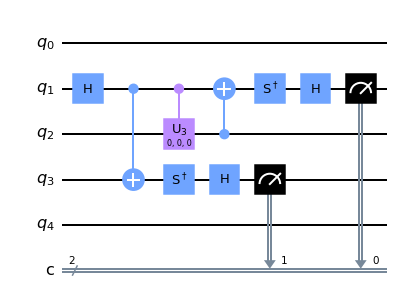

In [4]:
#######################################
#  Amplitude damping channel          #
#   with non-M. witness on IBMQ_VIGO  #
#######################################

# Quantum and classical register
q = QuantumRegister(5, name='q')
c = ClassicalRegister(2, name='c')

# Quantum circuit
ad = QuantumCircuit(q, c)

# Amplitude damping channel acting on system qubit
# with non-Markovianity witness
## Qubit identification
system = 1
environment = 2
ancilla = 3

# Define rotation angle
theta = 0.0

# Construct circuit
## Bell state between system and ancilla
ad.h(q[system])
ad.cx(q[system], q[ancilla])

## Channel acting on system qubit
ad.cu3(theta, 0.0, 0.0, q[system], q[environment])
ad.cx(q[environment], q[system])

## Local measurement for the witness
### Choose observable
observable = 'YY'
### Change to the corresponding basis
if observable == 'XX':
    ad.h(q[system])
    ad.h(q[ancilla])
elif observable == 'YY':
    ad.sdg(q[system])
    ad.h(q[system])
    ad.sdg(q[ancilla])
    ad.h(q[ancilla])
### Measure
ad.measure(q[system], c[0])
ad.measure(q[ancilla], c[1])

# Draw circuit
ad.draw(output='mpl')

The witness is given by the probability of measuring the system and the ancilla in state $| \phi^{+} \rangle \langle \phi^{+} | = (\mathbb{I}\otimes \mathbb{I} + \sigma_{x}\otimes \sigma_{x} - \sigma_{y}\otimes \sigma_{y} + \sigma_{z}\otimes \sigma_{z})/4$, and the above circuit allows for the measurement of the corresponding observables.

Write a function returning, for a given witness observable, $R$ and $t$, the corresponding circuit.

Suggested structure below.

In [5]:
def amplitude_damping_channel_witness(q, c, sys, env, anc, observable, R, t):
    """Returns a QuantumCircuit implementing the amplitude damping channel on the system qubit with non-Markovianity witness
    
    Args:
        q (QuantumRegister): the register to use for the circuit
        c (ClassicalRegister): the register to use for the measurement of the system and ancilla qubits
        sys (int): index for the system qubit
        env (int): index for the environment qubit
        anc (int): index for the ancillary qubit
        observable (str): the observable to be measured. Possible values "XX", "YY", "ZZ"
        R (float): value of R = \gamma_0/\lambda
        t (float): value of the time variable
    
    Returns:
        A QuantumCircuit object
    """

### Task 5

Simulate the dynamics with the witness for the same values of $R$ and $t$ as in Task 3. To do so, run the circuits for the three observables, $\sigma_{x}\otimes \sigma_{x}$, $\sigma_{y}\otimes \sigma_{y}$, and $\sigma_{z}\otimes \sigma_{z}$ and compute their expected values. This allows to compute the value of the witness as $1 + \left\langle \sigma_{x}\otimes \sigma_{x} \right\rangle - \left\langle\sigma_{y}\otimes \sigma_{y} \right\rangle + \left\langle\sigma_{z}\otimes \sigma_{z} \right\rangle)/4$. Plot the results as a function of $t$.

### Homework

Run the circuits on the IBM Q Experience with noise mitigation and plot the results.